In [1]:
import numpy as np
import pandas as pd

In [2]:
# from pymongo import MongoClient

# db = MongoClient('mongodb://localhost/SmartHome', 27017).SmartHome

In [3]:
# table = db.video_living_room.find({})

In [4]:
PATH ='C:/Users/ralkh/Desktop/smarthome-master/'

df = pd.read_csv('C:/Users/ralkh/Desktop/smarthome-master/data/train/00001/video_living_room.csv')
df.head()

,t,centre_2d_x,centre_2d_y,bb_2d_br_x,bb_2d_br_y,bb_2d_tl_x,bb_2d_tl_y,centre_3d_x,centre_3d_y,centre_3d_z,bb_3d_brb_x,bb_3d_brb_y,bb_3d_brb_z,bb_3d_flt_x,bb_3d_flt_y,bb_3d_flt_z
0,75.705,280.039154,117.408844,307.0,169.0,266.0,72.0,1017.734375,21.968750,2417.781250,1261.782349,-420.594055,2447.781250,887.554260,401.911316,2387.781250
1,75.751,286.778564,109.800583,307.0,169.0,262.0,74.0,1053.634766,84.765625,2370.007812,1237.156128,-412.385315,2400.007812,836.974121,377.458862,2340.007812
2,75.798,297.476990,117.436119,307.0,171.0,264.0,58.0,1144.165771,21.338135,2373.364746,1238.886597,-429.817719,2403.364746,854.609497,509.478729,2343.364746
3,75.830,296.249634,104.325584,307.0,171.0,264.0,38.0,1117.765625,128.589844,2339.488281,1221.423950,-423.759247,2369.488281,842.255005,664.085693,2309.488281
4,75.861,296.411377,102.132950,307.0,173.0,262.0,26.0,1112.454956,145.708405,2325.612061,1214.270996,-437.798431,2355.612061,821.094604,756.694946,2295.612061


In [5]:
df.describe()

,t,centre_2d_x,centre_2d_y,bb_2d_br_x,bb_2d_br_y,bb_2d_tl_x,bb_2d_tl_y,centre_3d_x,centre_3d_y,centre_3d_z,bb_3d_brb_x,bb_3d_brb_y,bb_3d_brb_z,bb_3d_flt_x,bb_3d_flt_y,bb_3d_flt_z
count,14523.000000,14523.000000,14523.000000,14523.000000,14523.000000,14523.000000,14523.000000,14523.000000,14523.000000,14523.000000,14523.000000,14523.000000,14523.000000,14523.000000,14523.000000,14523.000000
mean,537.608101,181.178952,81.256964,209.764718,139.086897,152.711836,33.149900,205.217669,371.673229,2764.262865,488.291793,-180.592508,2794.262865,-71.532947,823.188194,2734.262865
std,387.368526,39.371885,14.374687,38.796968,10.681084,41.790037,19.953003,355.059355,123.274658,250.516110,359.287883,85.566809,250.516110,374.965589,158.421328,250.516110
min,75.705000,36.899399,44.935623,75.000000,121.000000,6.000000,8.000000,-1143.893433,-337.222229,1971.067383,-816.059509,-489.471313,2001.067383,-1464.206177,-306.456085,1941.067383
25%,226.469500,182.225235,71.846592,211.000000,135.000000,148.000000,8.000000,221.327278,331.923996,2565.161621,487.586227,-189.491753,2595.161621,-108.803082,745.255585,2535.161621
50%,375.958000,189.992950,83.194244,217.000000,137.000000,166.000000,32.000000,284.635895,369.111359,2816.729736,558.615540,-166.695236,2846.729736,51.417366,859.920166,2786.729736
75%,839.818500,192.081940,86.194801,219.000000,139.000000,170.000000,46.000000,317.432236,436.113815,2888.235474,598.226440,-150.048401,2918.235474,101.055813,933.156067,2858.235474
max,1787.995000,305.992432,161.720963,307.000000,181.000000,306.000000,158.000000,1232.000000,691.522644,3305.667236,1317.787354,-10.659523,3335.667236,1216.704712,1078.888672,3275.667236


In [6]:
df.isnull().sum()

t              0
centre_2d_x    0
centre_2d_y    0
bb_2d_br_x     0
bb_2d_br_y     0
bb_2d_tl_x     0
bb_2d_tl_y     0
centre_3d_x    0
centre_3d_y    0
centre_3d_z    0
bb_3d_brb_x    0
bb_3d_brb_y    0
bb_3d_brb_z    0
bb_3d_flt_x    0
bb_3d_flt_y    0
bb_3d_flt_z    0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [8]:
%matplotlib inline
rcParams['figure.figsize'] = 30,5
sb.set_style('whitegrid')

In [9]:
from ipywidgets import widgets
from bokeh.models.annotations import Label
from bokeh.plotting import figure, output_file, curdoc,show,output_notebook

In [10]:
centre_3d_x = df.centre_3d_x
centre_3d_y = df.centre_3d_y
centre_3d_z = df.centre_3d_z

bb_3d_brb_x  = df.bb_3d_brb_x
bb_3d_brb_y  = df.bb_3d_brb_y
bb_3d_brb_z  = df.bb_3d_brb_z

bb_3d_flt_x  = df.bb_3d_flt_x
bb_3d_flt_y  = df.bb_3d_flt_y
bb_3d_flt_z  = df.bb_3d_flt_z

In [11]:
from ipywidgets import widgets
from bokeh.models.annotations import Label
from bokeh.plotting import figure, output_file, curdoc,show,output_notebook

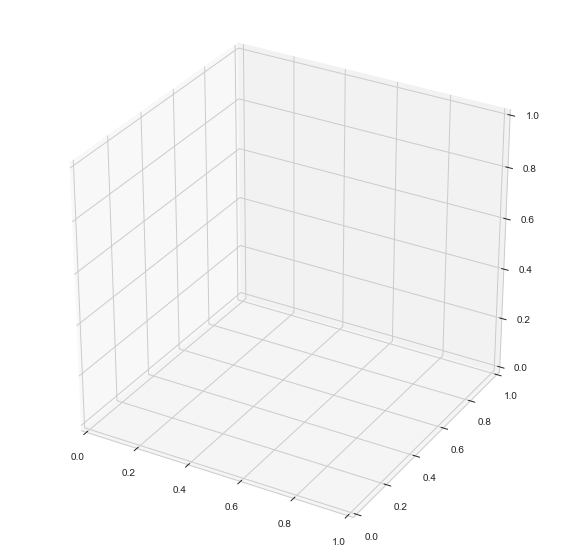

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

from itertools import product, combinations

# Rectangle()
rcParams['figure.figsize'] = 10,10
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

In [13]:
def Moves(x):
    fig = plt.figure()

    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs=centre_3d_x[x], ys=centre_3d_y[x], zs=centre_3d_z[x], c='r', marker='o')
    ax.scatter(xs=bb_3d_brb_x[x], ys=bb_3d_brb_y[x], zs=bb_3d_brb_z[x], c='b', marker='o')
    ax.scatter(xs=bb_3d_flt_x[x], ys=bb_3d_flt_y[x], zs=bb_3d_flt_z[x], c='b', marker='o')
   
    plt.show()

In [14]:
widgets.interact(Moves, x=widgets.IntSlider(min=1,max=centre_3d_y.count()-1,step=1,value=1));

Widget Javascript not detected.  It may not be installed or enabled properly.


In [15]:
from PIL import Image
import matplotlib.patches as patches
from matplotlib import animation, rc
from IPython.display import HTML

In [16]:
centre_2d_x = df.centre_2d_x
centre_2d_y = df.centre_2d_y

bb_2d_tl_x = df.bb_2d_tl_x
bb_2d_tl_y = df.bb_2d_tl_y
 
bb_2d_br_x = df.bb_2d_br_x 
bb_2d_br_y = df.bb_2d_br_x 

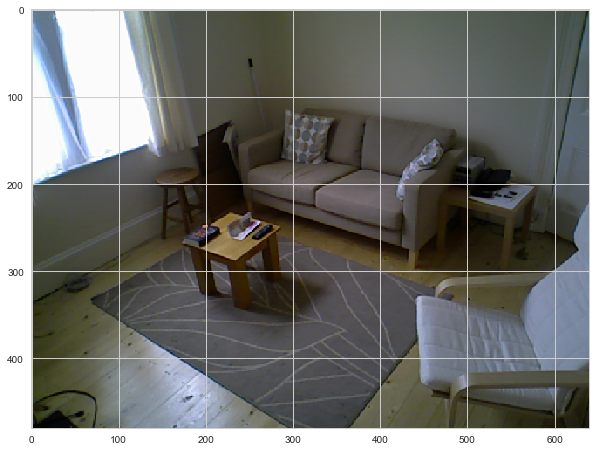

In [17]:
# First set up the figure, the axis, and the plot element we want to animate
im = np.array(Image.open('living_room.png'), dtype=np.uint8)


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

patch = patches.Rectangle((0, 0), 0, 0, fc='y')

In [18]:
# # initialization function: plot the background of each frame

def init():
    ax.add_patch(patch)
    return patch,

In [19]:
def animate(i):
    height =  bb_2d_br_y[i] - bb_2d_tl_y[i]

    weidth =  bb_2d_br_x[i] - bb_2d_tl_x[i]

    patch.set_width(weidth)
    patch.set_height(height)
    
    patch.set_xy([centre_2d_x[i] , centre_2d_x[i]])
    
    return patch,

In [20]:
anim = animation.FuncAnimation(fig, animate,
                               init_func=init,
                               frames=500,
                               interval=50,
                               blit=True)
plt.show()
HTML(anim.to_html5_video())